In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the dataset
df = pd.read_csv("/kaggle/input/most-watched-netflix-original-shows-tv-time/imdb.csv")

#Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lister-item-index   80 non-null     float64
 1   lister-item-header  80 non-null     object 
 2   certificate         80 non-null     object 
 3   runtime             80 non-null     object 
 4   genre               80 non-null     object 
 5   rating              80 non-null     float64
 6   votes               80 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.5+ KB
None


In [2]:
#Data Cleaning and Formatting
df['runtime'] = df['runtime'].str.replace(',', '').str.replace(' min', '').astype(int)

In [3]:
#Genre Analysis
genre_counts = df['genre'].value_counts()
print("Genre Counts:")
print(genre_counts)

Genre Counts:
genre
Comedy, Drama                   8
Drama, Mystery, Sci-Fi          5
Action, Crime, Drama            5
Drama, Fantasy, Horror          4
Comedy                          4
Crime, Drama, Mystery           4
Comedy, Crime, Drama            3
Drama                           3
Action, Adventure, Crime        2
Action, Adventure, Drama        2
Animation, Comedy, Drama        2
Animation, Action, Adventure    2
Adventure, Comedy, Drama        2
Action, Drama, Sci-Fi           2
Crime, Drama, Thriller          2
Comedy, Drama, Romance          2
Action, Adventure, Comedy       1
Comedy, Drama, Sci-Fi           1
Crime, Drama, Horror            1
Drama, Music, Musical           1
Drama, Thriller                 1
Documentary, Crime              1
Comedy, Drama, Sport            1
Comedy, Romance                 1
Crime, Drama                    1
Comedy, Drama, Family           1
Game-Show, Reality-TV           1
Animation, Short, Action        1
Crime, Drama, Fantasy       

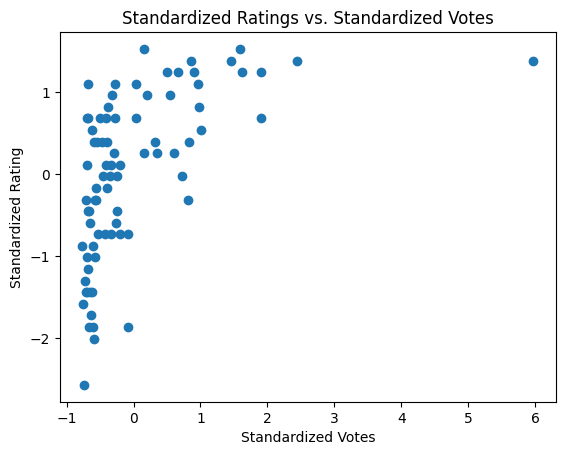

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the dataset
df = pd.read_csv("/kaggle/input/most-watched-netflix-original-shows-tv-time/imdb.csv")

# Remove commas from the 'votes' column
df['votes'] = df['votes'].str.replace(',', '')

# Convert 'votes' and 'rating' columns to float
df['votes'] = df['votes'].astype(float)
df['rating'] = df['rating'].astype(float)

# Standardize the 'votes' and 'rating' columns
scaler = StandardScaler()
df[['votes', 'rating']] = scaler.fit_transform(df[['votes', 'rating']])

# Scatter plot of standardized ratings vs. votes
plt.scatter(df['votes'], df['rating'])
plt.xlabel('Standardized Votes')
plt.ylabel('Standardized Rating')
plt.title('Standardized Ratings vs. Standardized Votes')
plt.show()


In [5]:
#Top Shows Analysis
top_shows = df.sort_values(by='rating', ascending=False).head(10)
print("Top Rated Shows:")
print(top_shows)

Top Rated Shows:
    lister-item-index          lister-item-header certificate  runtime  \
6                 7.0                      Narcos          15   50 min   
35               36.0             BoJack Horseman          18   25 min   
0                 1.0             Stranger Things          15   60 min   
12               13.0                        Dark          15   60 min   
72               73.0        Arrested Development          15   22 min   
3                 4.0                Black Mirror          18   60 min   
26               27.0                   The Crown          15   60 min   
29               30.0                  Mindhunter          18   60 min   
7                 8.0                   Daredevil          15   60 min   
32               33.0  The Haunting of Hill House          15  572 min   

                        genre    rating     votes  
6     Biography, Crime, Drama  1.525673  1.589872  
35   Animation, Comedy, Drama  1.525673  0.158003  
0      Drama

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


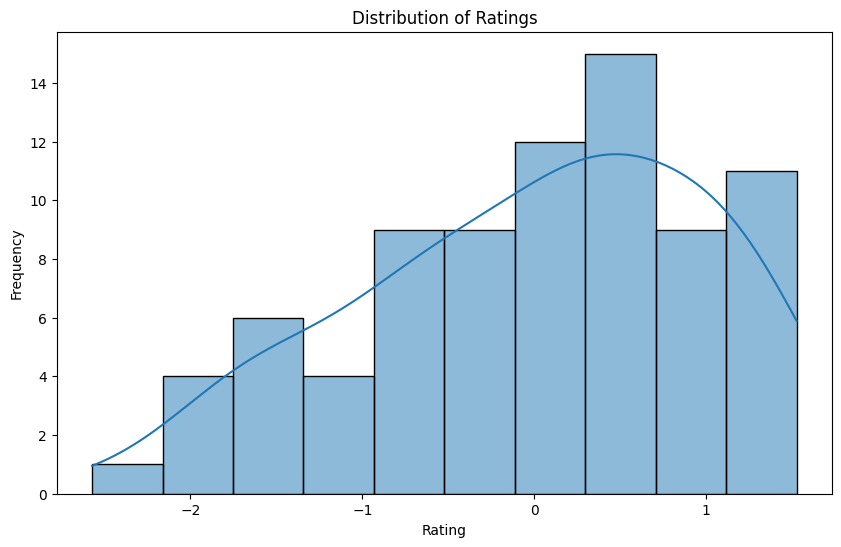

In [6]:
#Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [7]:
#Segmentation Analysis
genre_avg_rating = df.groupby('genre')['rating'].mean().sort_values(ascending=False)
print("Average Ratings by Genre:")
print(genre_avg_rating)

Average Ratings by Genre:
genre
Biography, Crime, Drama         1.525673
Drama, Horror, Mystery          1.243141
Biography, Drama, History       1.243141
Game-Show, Reality-TV           1.101875
Action, Drama, History          1.101875
Documentary, Crime              1.101875
Animation, Comedy, Drama        0.960609
Animation, Short, Action        0.960609
Crime, Drama                    0.960609
Drama, Music, Musical           0.678077
Crime, Drama, Fantasy           0.536811
Action, Crime, Drama            0.480305
Comedy, Drama, Sport            0.395545
Adventure, Comedy, Crime        0.395545
Comedy, Crime, Drama            0.395545
Crime, Drama, Mystery           0.360228
Comedy, Drama, Romance          0.324912
Action, Adventure, Comedy       0.254279
Comedy                          0.218962
Crime, Drama, Thriller          0.183646
Comedy, Horror                  0.113013
Drama, Fantasy, Mystery         0.113013
Animation, Comedy, Romance      0.113013
Animation, Action, Advent

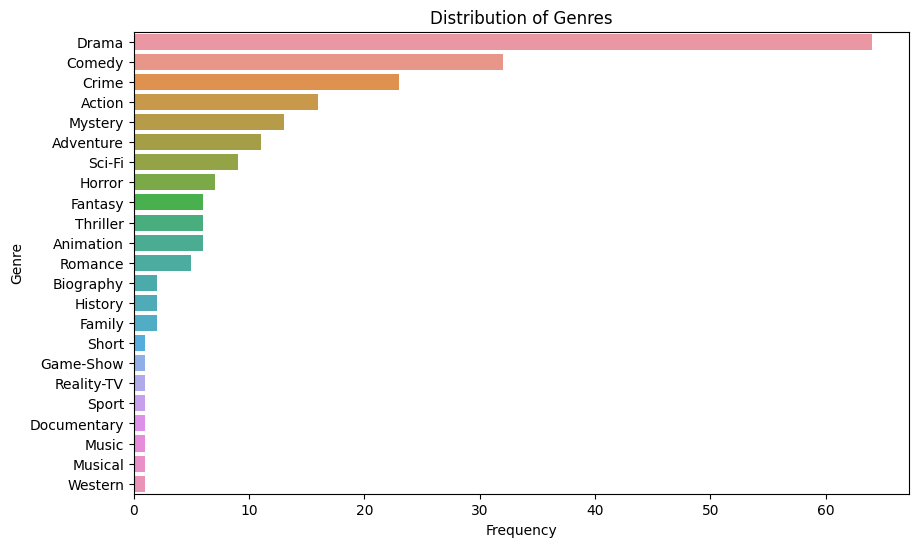

In [8]:
# Splitting genres and creating a new DataFrame with separate genres
genres_df = df['genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genres_df['genre'] = genres_df['genre'].str.strip()

# Plot the distribution of genres
plt.figure(figsize=(10, 6))  # Set figure size
sns.countplot(data=genres_df, y='genre', order=genres_df['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()


In [9]:
# Splitting genres and creating a new DataFrame with separate genres
genres_split = df['genre'].str.split(',', expand=True)
genres_split = genres_split.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Creating a long format DataFrame with each genre in a separate row
genres_long = genres_split.stack().reset_index(level=1, drop=True).rename('genre')

# Merging the long format DataFrame with the original DataFrame to retain ratings
genre_ratings = pd.merge(genres_long, df[['rating']], left_index=True, right_index=True)

# Calculating average ratings for each genre
genre_avg_rating = genre_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Displaying average ratings by genre
print("Average Ratings by Genre:")
print(genre_avg_rating)


Average Ratings by Genre:
genre
Biography      1.384407
History        1.172508
Documentary    1.101875
Reality-TV     1.101875
Game-Show      1.101875
Short          0.960609
Music          0.678077
Musical        0.678077
Animation      0.513267
Sport          0.395545
Crime          0.254279
Mystery        0.113013
Action         0.024722
Drama         -0.023839
Romance       -0.028253
Comedy        -0.054741
Fantasy       -0.145975
Horror        -0.230062
Western       -0.310785
Sci-Fi        -0.373570
Adventure     -0.503421
Thriller      -0.852305
Family        -1.017116
Name: rating, dtype: float64


/tmp/ipykernel_18/1168957034.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  genres_split = genres_split.applymap(lambda x: x.strip() if isinstance(x, str) else x)


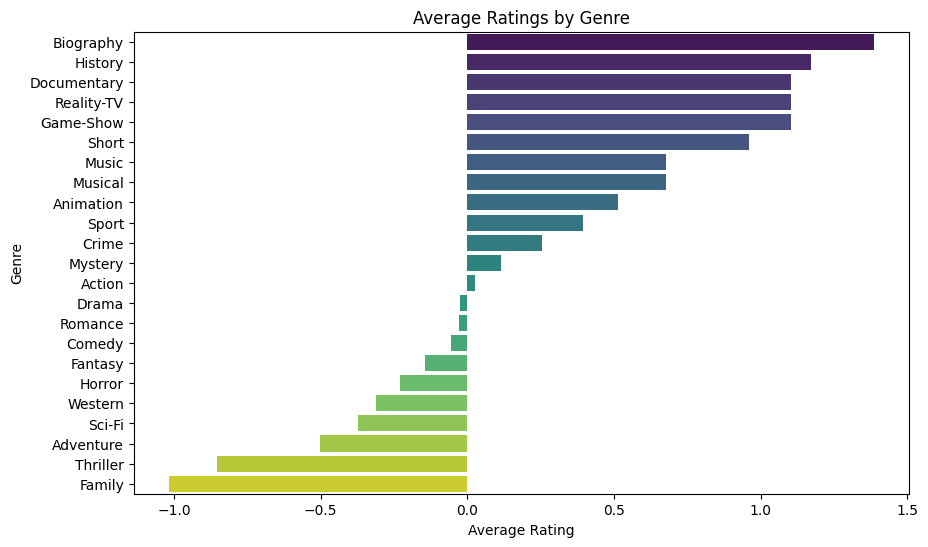

In [10]:
# Plotting average ratings by genre
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, palette='viridis')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()
